In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import re

Importing data

In [31]:
df = pd.read_csv("Reviews.csv")

In [32]:
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568454 entries, 0 to 568453
Data columns (total 10 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   Id                      568454 non-null  int64 
 1   ProductId               568454 non-null  object
 2   UserId                  568454 non-null  object
 3   ProfileName             568438 non-null  object
 4   HelpfulnessNumerator    568454 non-null  int64 
 5   HelpfulnessDenominator  568454 non-null  int64 
 6   Score                   568454 non-null  int64 
 7   Time                    568454 non-null  int64 
 8   Summary                 568427 non-null  object
 9   Text                    568454 non-null  object
dtypes: int64(5), object(5)
memory usage: 43.4+ MB


In [34]:
df.shape

(568454, 10)

*Changing the data type*

In [35]:
df['Id'] = df['Id'].astype('int16')

In [36]:
df['HelpfulnessNumerator'] = df['HelpfulnessNumerator'].astype('int8')

In [37]:
df['HelpfulnessDenominator'] = df['HelpfulnessDenominator'].astype('int8')

In [38]:
df['Score'] = df['Score'].astype('int8')

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568454 entries, 0 to 568453
Data columns (total 10 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   Id                      568454 non-null  int16 
 1   ProductId               568454 non-null  object
 2   UserId                  568454 non-null  object
 3   ProfileName             568438 non-null  object
 4   HelpfulnessNumerator    568454 non-null  int8  
 5   HelpfulnessDenominator  568454 non-null  int8  
 6   Score                   568454 non-null  int8  
 7   Time                    568454 non-null  int64 
 8   Summary                 568427 non-null  object
 9   Text                    568454 non-null  object
dtypes: int16(1), int64(1), int8(3), object(5)
memory usage: 28.7+ MB


*Changing the format of time*

In [40]:
df['Time']

0         1303862400
1         1346976000
2         1219017600
3         1307923200
4         1350777600
             ...    
568449    1299628800
568450    1331251200
568451    1329782400
568452    1331596800
568453    1338422400
Name: Time, Length: 568454, dtype: int64

In [41]:
df['Time'] = df['Time'].apply( lambda x : datetime.utcfromtimestamp(x))

In [42]:
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,2011-04-27,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,2012-09-07,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,2008-08-18,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,2011-06-13,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,2012-10-21,Great taffy,Great taffy at a great price. There was a wid...


*Converting summary and reviews to lowercase*

In [43]:
df['Text'] = df['Text'].str.lower()

In [44]:
df['Summary'] = df['Summary'].str.lower()

*Reducing data*

In [45]:
df = df.iloc[:50000]

In [46]:
df.shape

(50000, 10)

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Id                      50000 non-null  int16         
 1   ProductId               50000 non-null  object        
 2   UserId                  50000 non-null  object        
 3   ProfileName             49997 non-null  object        
 4   HelpfulnessNumerator    50000 non-null  int8          
 5   HelpfulnessDenominator  50000 non-null  int8          
 6   Score                   50000 non-null  int8          
 7   Time                    50000 non-null  datetime64[ns]
 8   Summary                 49998 non-null  object        
 9   Text                    50000 non-null  object        
dtypes: datetime64[ns](1), int16(1), int8(3), object(5)
memory usage: 2.5+ MB


*Removing whitespaces*

In [48]:
df['Text'] = df['Text'].str.strip()

In [49]:
df['Summary'] = df['Summary'].str.strip()

*Removing HTML Tags*

In [50]:
df['Text'] = df['Text'].str.replace(r'<.*?>' , '' , regex = True)

*Finding URl*

In [51]:
df['Text'].str.contains(r'https?://\S+|www\.\S+',case=False, na=False)

0        False
1        False
2        False
3        False
4        False
         ...  
49995    False
49996    False
49997    False
49998    False
49999    False
Name: Text, Length: 50000, dtype: bool

*Replacing URL*

In [52]:
df['Text'] = df['Text'].str.replace(r'https?://\S+|www\.\S+' , '', regex = True)

In [53]:
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,2011-04-27,good quality dog food,i have bought several of the vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,2012-09-07,not as advertised,product arrived labeled as jumbo salted peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,2008-08-18,"""delight"" says it all",this is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,2011-06-13,cough medicine,if you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,2012-10-21,great taffy,great taffy at a great price. there was a wid...


*Dropping ProfileName*

In [54]:
df = df.drop('ProfileName' , axis = 1)

In [55]:
df.head()

,Id,ProductId,UserId,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,1,1,5,2011-04-27,good quality dog food,i have bought several of the vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,0,0,1,2012-09-07,not as advertised,product arrived labeled as jumbo salted peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,1,1,4,2008-08-18,"""delight"" says it all",this is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,3,3,2,2011-06-13,cough medicine,if you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,0,0,5,2012-10-21,great taffy,great taffy at a great price. there was a wid...


In [56]:
df['Summary'] = df['Summary'].fillna('')

In [57]:
df[~(df['Summary'].str.contains(r'[A-Za-z]'))]

,Id,ProductId,UserId,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
5295,5296,B002TMTP12,A1R3VFN96PO1DX,11,11,4,2011-05-18,3000 != 850,the fact that the title of this product includ...
8481,8482,B003VXFK44,A3H6IRPMRG40IA,0,0,2,2011-10-05,...,"while good quality, it was not at all what i e..."
9190,9191,B006N3IG4K,A3H6IRPMRG40IA,0,0,2,2011-10-05,...,"while good quality, it was not at all what i e..."
10710,10711,B00389Q4XW,A3NJQKIAYAEOT3,0,0,1,2011-01-10,$26.99?,"this time, forget ordering through amazon. yo..."
13893,13894,B000NQA2R2,A1328ISZ5BJ23P,3,3,5,2010-01-30,=],i still have some of this; i didn't expect it ...
16181,16182,B0001BVD04,A3QGBXO3BLKOLW,9,13,3,2006-06-13,$30?,$30 for a 12 pack?are you serious?trader joe's...
17078,17079,B000F2VESU,A1DXCMSP6DUU5K,0,3,3,2012-07-08,????,dont know how to rate this. it shipped 2 days ...
17456,17457,B0045Z6K50,AJIYG47R4J7NN,0,0,5,2011-03-16,#1!,this is by far my favorite k-cup.i like my cof...
17469,17470,B0045Z6K50,A1SJAI0FX70B3D,0,4,1,2011-09-12,$$$$$$$$$$$$$$$$$$$$$$$$$$,i buy most everything from amazon but not coff...
21555,21556,B002QWP89S,A2X243TOVWCZYJ,2,6,1,2012-01-10,96=45,just because you see 96 treats on the box your...


*Removing emoticons*

In [58]:
def remove_emoji(string):
    emoji_pattern = re.compile("["
                           u"U0001F600-U0001F64F"  # emoticons
                           u"U0001F300-U0001F5FF"  # symbols & pictographs
                           u"U0001F680-U0001F6FF"  # transport & map symbols
                           u"U0001F1E0-U0001F1FF"  # flags (iOS)
                           u"U00002702-U000027B0"
                           u"U000024C2-U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', string)
df['Text'] = df['Text'].apply(remove_emoji)

In [59]:
def remove_emoji(string):
    emoji_pattern = re.compile("["
                           u"U0001F600-U0001F64F"  # emoticons
                           u"U0001F300-U0001F5FF"  # symbols & pictographs
                           u"U0001F680-U0001F6FF"  # transport & map symbols
                           u"U0001F1E0-U0001F1FF"  # flags (iOS)
                           u"U00002702-U000027B0"
                           u"U000024C2-U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', string)
df['Summary'] = df['Summary'].apply(remove_emoji)

In [60]:
EMOTICONS = {
    u":‑)":"Happy",
    u":-))":"Happy",
    u":)":"Happy",
    u":))":"Happy face or smiley",
    u":)))":"Happy face or smiley",
    u":-]":"Happy face or smiley",
    u":]":"Happy face or smiley",
    u":-3":"Happy face smiley",
    u":3":"Happy face smiley",
    u":->":"Happy face smiley",
    u":>":"Happy face smiley",
    u"8-)":"Happy face smiley",
    u":o)":"Happy face smiley",
    u":-}":"Happy face smiley",
    u":}":"Happy face smiley",
    u":-)":"Happy face smiley",
    u":c)":"Happy face smiley",
    u":^)":"Happy face smiley",
    u"=]":"Happy face smiley",
    u":-(":"Frown, sad, angry or pouting",
    u":‑(":"Frown, sad, angry or pouting",
    u":(":"Frown, sad, angry or pouting",
    u":‑(":"Frown, sad, angry or pouting",
    u":(":"Frown, sad, angry or pouting",
    u":‑<":"Frown, sad, angry or pouting",
    u":<":"Frown, sad, angry or pouting",
    u":‑[":"Frown, sad, angry or pouting",
    u":[":"Frown, sad, angry or pouting",
    u":-||":"Frown, sad, angry or pouting",
    u">:[":"Frown, sad, angry or pouting",
    u":{":"Frown, sad, angry or pouting",
    u":@":"Frown, sad, angry or pouting",
    u">:(":"Frown, sad, angry or pouting",
    u":'‑(":"Crying",
    u":'(":"Crying"
}


def convert_emoticons(text):
    for emot in EMOTICONS:
        replacement = "".join(EMOTICONS[emot].replace(",", "").split()[0])
        text = text.replace(emot, replacement)    
    return text
df['Summary'] = df['Summary'].apply(convert_emoticons)

In [61]:
df[~(df['Summary'].str.contains(r'[A-Za-z]'))]

,Id,ProductId,UserId,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
5295,5296,B002TMTP12,A1R3VFN96PO1DX,11,11,4,2011-05-18,!,the fact that the title of this product includ...
8481,8482,B003VXFK44,A3H6IRPMRG40IA,0,0,2,2011-10-05,...,"while good quality, it was not at all what i e..."
9190,9191,B006N3IG4K,A3H6IRPMRG40IA,0,0,2,2011-10-05,...,"while good quality, it was not at all what i e..."
10710,10711,B00389Q4XW,A3NJQKIAYAEOT3,0,0,1,2011-01-10,$.,"this time, forget ordering through amazon. yo..."
13893,13894,B000NQA2R2,A1328ISZ5BJ23P,3,3,5,2010-01-30,],i still have some of this i didn't expect it t...
16181,16182,B0001BVD04,A3QGBXO3BLKOLW,9,13,3,2006-06-13,$,$ for a packare you serioustrader joe's sells...
17078,17079,B000F2VESU,A1DXCMSP6DUU5K,0,3,3,2012-07-08,,dont know how to rate this. it shipped days l...
17456,17457,B0045Z6K50,AJIYG47R4J7NN,0,0,5,2011-03-16,#!,this is by far my favorite k-cup.i like my cof...
17469,17470,B0045Z6K50,A1SJAI0FX70B3D,0,4,1,2011-09-12,$$$$$$$$$$$$$$$$$$$$$$$$$$,i buy most everything from amazon but not coff...
21555,21556,B002QWP89S,A2X243TOVWCZYJ,2,6,1,2012-01-10,,just because you see treats on the box your c...


In [62]:
df['Text'] = df['Text'].apply(convert_emoticons)

*Removing punctuations*

In [63]:
#for summary
import string

string.punctuation
def remove_punctuations(data):
    for i in string.punctuation:
        if i in data:
            data = data.replace(i,'')
    return data
df['Summary'] = df['Summary'].apply(remove_punctuations)

In [64]:
string.punctuation


'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [65]:
df[~(df['Summary'].str.contains(r'[A-Za-z]'))]

,Id,ProductId,UserId,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
5295,5296,B002TMTP12,A1R3VFN96PO1DX,11,11,4,2011-05-18,,the fact that the title of this product includ...
8481,8482,B003VXFK44,A3H6IRPMRG40IA,0,0,2,2011-10-05,,"while good quality, it was not at all what i e..."
9190,9191,B006N3IG4K,A3H6IRPMRG40IA,0,0,2,2011-10-05,,"while good quality, it was not at all what i e..."
10710,10711,B00389Q4XW,A3NJQKIAYAEOT3,0,0,1,2011-01-10,,"this time, forget ordering through amazon. yo..."
13893,13894,B000NQA2R2,A1328ISZ5BJ23P,3,3,5,2010-01-30,,i still have some of this i didn't expect it t...
16181,16182,B0001BVD04,A3QGBXO3BLKOLW,9,13,3,2006-06-13,,$ for a packare you serioustrader joe's sells...
17078,17079,B000F2VESU,A1DXCMSP6DUU5K,0,3,3,2012-07-08,,dont know how to rate this. it shipped days l...
17456,17457,B0045Z6K50,AJIYG47R4J7NN,0,0,5,2011-03-16,,this is by far my favorite k-cup.i like my cof...
17469,17470,B0045Z6K50,A1SJAI0FX70B3D,0,4,1,2011-09-12,,i buy most everything from amazon but not coff...
21555,21556,B002QWP89S,A2X243TOVWCZYJ,2,6,1,2012-01-10,,just because you see treats on the box your c...


In [66]:
#for Reviews

import string

string.punctuation
def remove_punctuations(data):
    for i in string.punctuation:
        if i in data:
            data = data.replace(i,'')
    return data

df['Text'] = df['Text'].apply(remove_punctuations)

*Removing numbers*

In [67]:
df['Summary'] = df['Summary'].str.replace(r'[0-9]', '', regex=True)


In [68]:
df['Text'] = df['Text'].str.replace(r'[0-9]' , '', regex = True) 

In [69]:
#checking again for non-string values

df[~(df['Summary'].str.contains(r'[A-Za-z]'))]

,Id,ProductId,UserId,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
5295,5296,B002TMTP12,A1R3VFN96PO1DX,11,11,4,2011-05-18,,the fact that the title of this product includ...
8481,8482,B003VXFK44,A3H6IRPMRG40IA,0,0,2,2011-10-05,,while good quality it was not at all what i ex...
9190,9191,B006N3IG4K,A3H6IRPMRG40IA,0,0,2,2011-10-05,,while good quality it was not at all what i ex...
10710,10711,B00389Q4XW,A3NJQKIAYAEOT3,0,0,1,2011-01-10,,this time forget ordering through amazon you ...
13893,13894,B000NQA2R2,A1328ISZ5BJ23P,3,3,5,2010-01-30,,i still have some of this i didnt expect it to...
16181,16182,B0001BVD04,A3QGBXO3BLKOLW,9,13,3,2006-06-13,,for a packare you serioustrader joes sells ...
17078,17079,B000F2VESU,A1DXCMSP6DUU5K,0,3,3,2012-07-08,,dont know how to rate this it shipped days la...
17456,17457,B0045Z6K50,AJIYG47R4J7NN,0,0,5,2011-03-16,,this is by far my favorite kcupi like my coffe...
17469,17470,B0045Z6K50,A1SJAI0FX70B3D,0,4,1,2011-09-12,,i buy most everything from amazon but not coff...
21555,21556,B002QWP89S,A2X243TOVWCZYJ,2,6,1,2012-01-10,,just because you see treats on the box your c...


In [70]:
df['Summary']

0                 good quality dog food
1                     not as advertised
2                   delight says it all
3                        cough medicine
4                           great taffy
                      ...              
49995         grown to really like them
49996    healthy snack at a great price
49997    raw revolution hazelnut cashew
49998      fantastic but chew carefully
49999            very tasty and healthy
Name: Summary, Length: 50000, dtype: object

*Expanding abbreviations*

In [71]:
import re
def remove_abb(data):
    data = re.sub(r"he's", "he is", data)
    data = re.sub(r"there's", "there is", data)
    data = re.sub(r"We're", "We are", data)
    data = re.sub(r"That's", "That is", data)
    data = re.sub(r"won't", "will not", data)
    data = re.sub(r"they're", "they are", data)
    data = re.sub(r"Can't", "Cannot", data)
    data = re.sub(r"wasn't", "was not", data)
    data = re.sub(r"don\x89Ûªt", "do not", data)
    data= re.sub(r"aren't", "are not", data)
    data = re.sub(r"isn't", "is not", data)
    data = re.sub(r"What's", "What is", data)
    data = re.sub(r"haven't", "have not", data)
    data = re.sub(r"hasn't", "has not", data)
    data = re.sub(r"There's", "There is", data)
    data = re.sub(r"He's", "He is", data)
    data = re.sub(r"It's", "It is", data)
    data = re.sub(r"You're", "You are", data)
    data = re.sub(r"I'M", "I am", data)
    data = re.sub(r"shouldn't", "should not", data)
    data = re.sub(r"wouldn't", "would not", data)
    data = re.sub(r"i'm", "I am", data)
    data = re.sub(r"I\x89Ûªm", "I am", data)
    data = re.sub(r"I'm", "I am", data)
    data = re.sub(r"Isn't", "is not", data)
    data = re.sub(r"Here's", "Here is", data)
    data = re.sub(r"you've", "you have", data)
    data = re.sub(r"you\x89Ûªve", "you have", data)
    data = re.sub(r"we're", "we are", data)
    data = re.sub(r"what's", "what is", data)
    data = re.sub(r"couldn't", "could not", data)
    data = re.sub(r"we've", "we have", data)
    data = re.sub(r"it\x89Ûªs", "it is", data)
    data = re.sub(r"doesn\x89Ûªt", "does not", data)
    data = re.sub(r"It\x89Ûªs", "It is", data)
    data = re.sub(r"Here\x89Ûªs", "Here is", data)
    data = re.sub(r"who's", "who is", data)
    data = re.sub(r"I\x89Ûªve", "I have", data)
    data = re.sub(r"y'all", "you all", data)
    data = re.sub(r"can\x89Ûªt", "cannot", data)
    data = re.sub(r"would've", "would have", data)
    data = re.sub(r"it'll", "it will", data)
    data = re.sub(r"we'll", "we will", data)
    data = re.sub(r"wouldn\x89Ûªt", "would not", data)
    data = re.sub(r"We've", "We have", data)
    data = re.sub(r"he'll", "he will", data)
    data = re.sub(r"Y'all", "You all", data)
    data = re.sub(r"Weren't", "Were not", data)
    data = re.sub(r"Didn't", "Did not", data)
    data = re.sub(r"they'll", "they will", data)
    data = re.sub(r"they'd", "they would", data)
    data = re.sub(r"DON'T", "DO NOT", data)
    data = re.sub(r"That\x89Ûªs", "That is", data)
    data = re.sub(r"they've", "they have", data)
    data = re.sub(r"i'd", "I would", data)
    data = re.sub(r"should've", "should have", data)
    data = re.sub(r"You\x89Ûªre", "You are", data)
    data = re.sub(r"where's", "where is", data)
    data = re.sub(r"Don\x89Ûªt", "Do not", data)
    data = re.sub(r"we'd", "we would", data)
    data = re.sub(r"i'll", "I will", data)
    data = re.sub(r"weren't", "were not", data)
    data = re.sub(r"They're", "They are", data)
    data = re.sub(r"Can\x89Ûªt", "Cannot", data)
    data = re.sub(r"you\x89Ûªll", "you will", data)
    data = re.sub(r"I\x89Ûªd", "I would", data)
    data = re.sub(r"let's", "let us", data)
    data = re.sub(r"it's", "it is", data)
    data = re.sub(r"can't", "cannot", data)
    data = re.sub(r"don't", "do not", data)
    data = re.sub(r"you're", "you are", data)
    data = re.sub(r"i've", "I have", data)
    data = re.sub(r"that's", "that is", data)
    data = re.sub(r"i'll", "I will", data)
    data = re.sub(r"doesn't", "does not",data)
    data = re.sub(r"i'd", "I would", data)
    data = re.sub(r"didn't", "did not", data)
    data = re.sub(r"ain't", "am not", data)
    data = re.sub(r"you'll", "you will", data)
    data = re.sub(r"I've", "I have", data)
    data = re.sub(r"Don't", "do not", data)
    data = re.sub(r"I'll", "I will", data)
    data = re.sub(r"I'd", "I would", data)
    data = re.sub(r"Let's", "Let us", data)
    data = re.sub(r"you'd", "You would", data)
    data = re.sub(r"It's", "It is", data)
    data = re.sub(r"Ain't", "am not", data)
    data = re.sub(r"Haven't", "Have not", data)
    data = re.sub(r"Could've", "Could have", data)
    data = re.sub(r"youve", "you have", data)  
    data = re.sub(r"donå«t", "do not", data)
    
    return data

df['Text'] = df['Text'].apply(remove_abb)

In [72]:
df['Summary'] = df['Summary'].apply(remove_abb)

In [73]:
df['Summary']

0                 good quality dog food
1                     not as advertised
2                   delight says it all
3                        cough medicine
4                           great taffy
                      ...              
49995         grown to really like them
49996    healthy snack at a great price
49997    raw revolution hazelnut cashew
49998      fantastic but chew carefully
49999            very tasty and healthy
Name: Summary, Length: 50000, dtype: object

**PERFORMING EDA**

*Average Rating*

In [74]:
df.head()

,Id,ProductId,UserId,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,1,1,5,2011-04-27,good quality dog food,i have bought several of the vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,0,0,1,2012-09-07,not as advertised,product arrived labeled as jumbo salted peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,1,1,4,2008-08-18,delight says it all,this is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,3,3,2,2011-06-13,cough medicine,if you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,0,0,5,2012-10-21,great taffy,great taffy at a great price there was a wide...


In [75]:
df['Score'].mean()

4.14584

*Temporal Analysis*

In [76]:
df['Time'] = pd.to_datetime(df['Time'])
df.set_index('Time', inplace=True)

In [77]:
df.index

DatetimeIndex(['2011-04-27', '2012-09-07', '2008-08-18', '2011-06-13',
               '2012-10-21', '2012-07-12', '2012-06-20', '2012-05-03',
               '2011-11-23', '2012-10-26',
               ...
               '2010-07-18', '2010-03-02', '2010-02-27', '2010-02-17',
               '2009-12-30', '2009-12-19', '2009-11-23', '2009-11-05',
               '2009-07-16', '2007-05-10'],
              dtype='datetime64[ns]', name='Time', length=50000, freq=None)

In [78]:
df['date'] = df.index.date   #extracting the date from the timestamp

In [79]:
review_counts = df['date'].value_counts().sort_index()  # count of reviews for each unique date in chronological order.
review_counts

2000-06-23     1
2000-06-29     1
2003-10-25     2
2003-10-31     1
2003-11-01     1
              ..
2012-10-22    62
2012-10-23    71
2012-10-24    75
2012-10-25    58
2012-10-26    37
Name: date, Length: 2489, dtype: int64

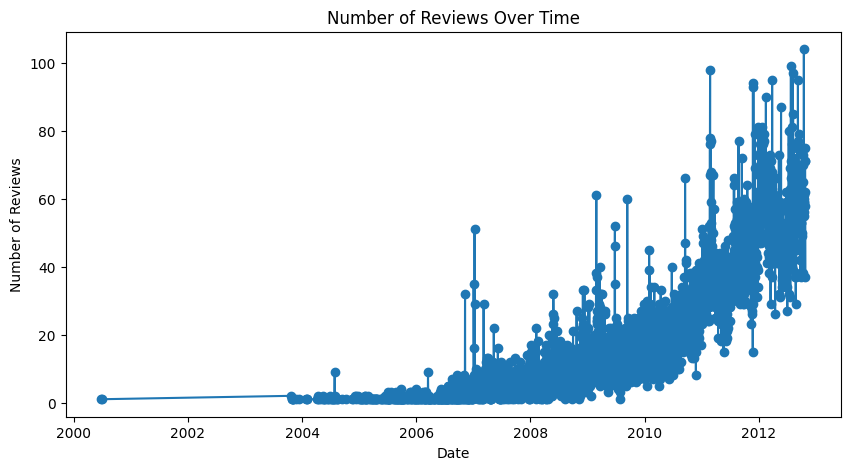

In [80]:
plt.figure(figsize=(10, 5))
plt.plot(review_counts.index, review_counts.values, marker='o')
plt.title('Number of Reviews Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Reviews')
plt.show()

*Calculating sentiment scores*

In [81]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [82]:
sent = SentimentIntensityAnalyzer()  #create instance

In [83]:
polarity = [round(sent.polarity_scores(i)['compound'], 2) for i in df['Text']]
df['sentiment_score'] = polarity

In [84]:
df.head()

,Id,ProductId,UserId,HelpfulnessNumerator,HelpfulnessDenominator,Score,Summary,Text,date,sentiment_score
Time,,,,,,,,,,
2011-04-27,1,B001E4KFG0,A3SGXH7AUHU8GW,1,1,5,good quality dog food,i have bought several of the vitality canned d...,2011-04-27,0.94
2012-09-07,2,B00813GRG4,A1D87F6ZCVE5NK,0,0,1,not as advertised,product arrived labeled as jumbo salted peanut...,2012-09-07,-0.57
2008-08-18,3,B000LQOCH0,ABXLMWJIXXAIN,1,1,4,delight says it all,this is a confection that has been around a fe...,2008-08-18,0.83
2011-06-13,4,B000UA0QIQ,A395BORC6FGVXV,3,3,2,cough medicine,if you are looking for the secret ingredient i...,2011-06-13,0.44
2012-10-21,5,B006K2ZZ7K,A1UQRSCLF8GW1T,0,0,5,great taffy,great taffy at a great price there was a wide...,2012-10-21,0.95


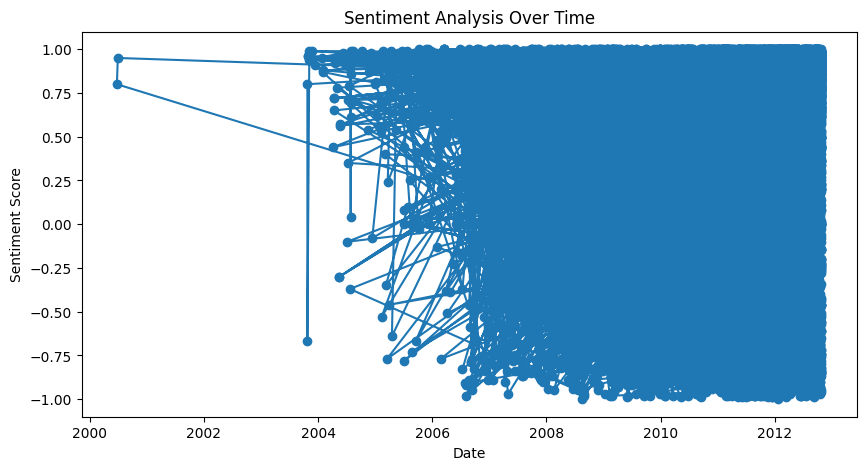

In [85]:
plt.figure(figsize=(10, 5))
plt.plot(df.index, df['sentiment_score'], marker='o')
plt.title('Sentiment Analysis Over Time')
plt.xlabel('Date')
plt.ylabel('Sentiment Score')
plt.show()

In [86]:
rolling_avg = df['sentiment_score'].rolling(window=30).mean() 

In [87]:
rolling_avg

Time
2011-04-27         NaN
2012-09-07         NaN
2008-08-18         NaN
2011-06-13         NaN
2012-10-21         NaN
                ...   
2009-12-19    0.712333
2009-11-23    0.713000
2009-11-05    0.723667
2009-07-16    0.707667
2007-05-10    0.704000
Name: sentiment_score, Length: 50000, dtype: float64

In [88]:
import spacy

In [89]:
nlp = spacy.load("en_core_web_sm")


In [90]:
ner_cat = ['PRODUCT']

*Tokenizing*

In [116]:
import nltk

In [123]:
df.head()

,Id,ProductId,UserId,HelpfulnessNumerator,HelpfulnessDenominator,Score,Summary,Text,date,sentiment_score,tokenized_text,sc,tokenized_texts
Time,,,,,,,,,,,,,
2011-04-27,1,B001E4KFG0,A3SGXH7AUHU8GW,1,1,5,good quality dog food,i have bought several of the vitality canned d...,2011-04-27,0.94,"[i, have, bought, several, of, the, vitality, ...",Positive,"[i, have, bought, several, of, the, vitality, ..."
2012-09-07,2,B00813GRG4,A1D87F6ZCVE5NK,0,0,1,not as advertised,product arrived labeled as jumbo salted peanut...,2012-09-07,-0.57,"[product, arrived, labeled, as, jumbo, salted,...",Negative,"[product, arrived, labeled, as, jumbo, salted,..."
2008-08-18,3,B000LQOCH0,ABXLMWJIXXAIN,1,1,4,delight says it all,this is a confection that has been around a fe...,2008-08-18,0.83,"[this, is, a, confection, that, has, been, aro...",Positive,"[this, is, a, confection, that, has, been, aro..."
2011-06-13,4,B000UA0QIQ,A395BORC6FGVXV,3,3,2,cough medicine,if you are looking for the secret ingredient i...,2011-06-13,0.44,"[if, you, are, looking, for, the, secret, ingr...",Positive,"[if, you, are, looking, for, the, secret, ingr..."
2012-10-21,5,B006K2ZZ7K,A1UQRSCLF8GW1T,0,0,5,great taffy,great taffy at a great price there was a wide...,2012-10-21,0.95,"[great, taffy, at, a, great, price, there, was...",Positive,"[great, taffy, at, a, great, price, there, was..."


**NER**

*WORD CLOUD*

In [113]:
#labelling sentiment scores

df['sc'] = df['sentiment_score'].apply(lambda x: 'Negative' if '-' in str(x) else 'Positive')

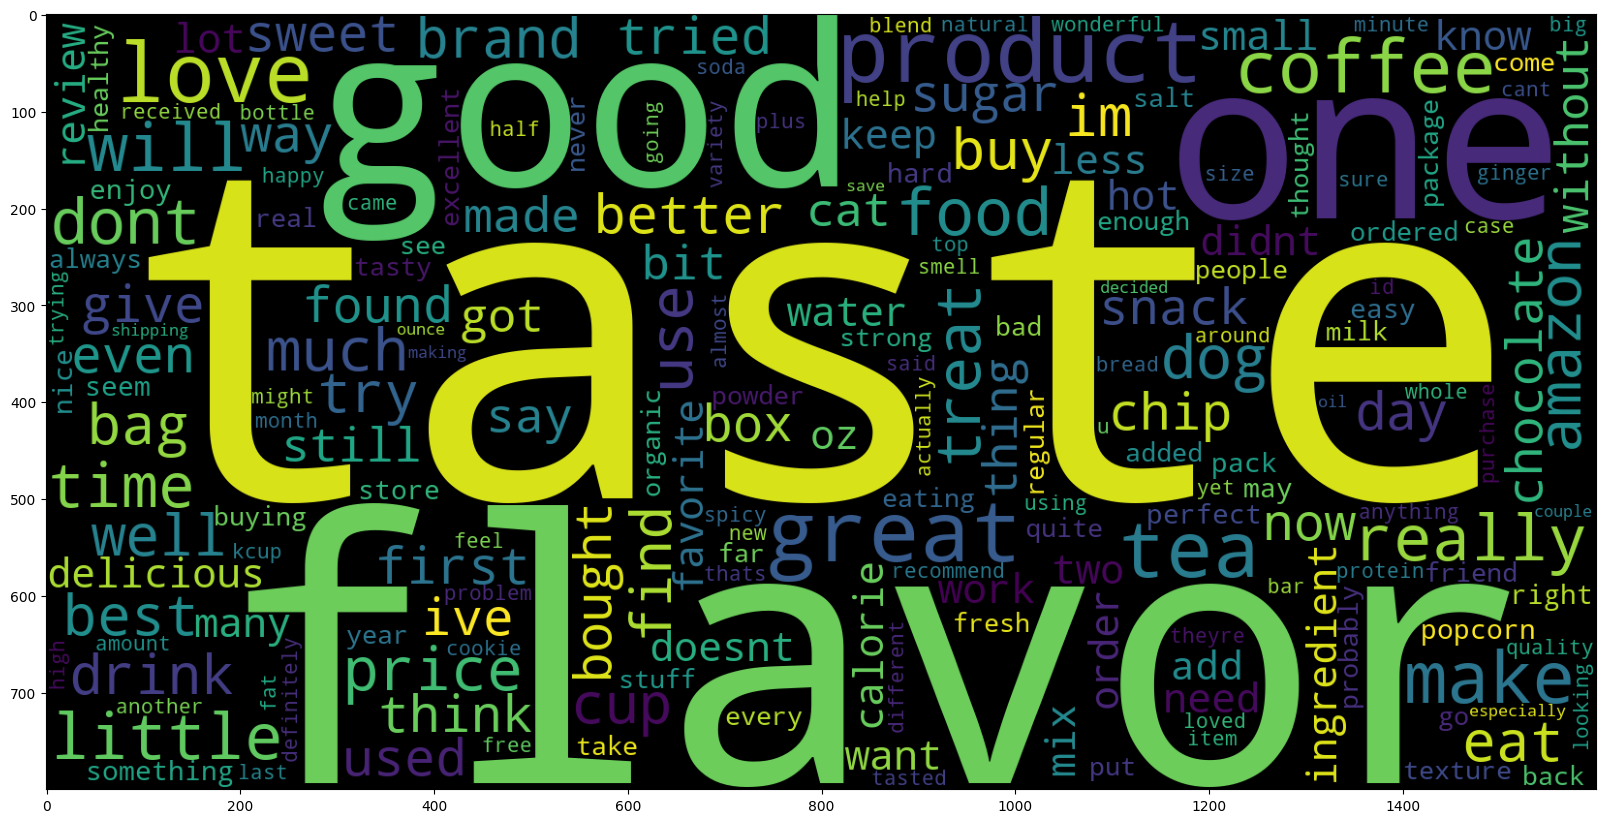

In [114]:
#for positive sentiment
from wordcloud import WordCloud
positive_reviews = df[df["sc"] == 'Positive']['Text'].sample(n=1000, random_state=42).str.cat(sep=' ')

plt.figure(figsize = (20,20))
wc = WordCloud(width=1600, height=800).generate(positive_reviews)
plt.imshow(wc)

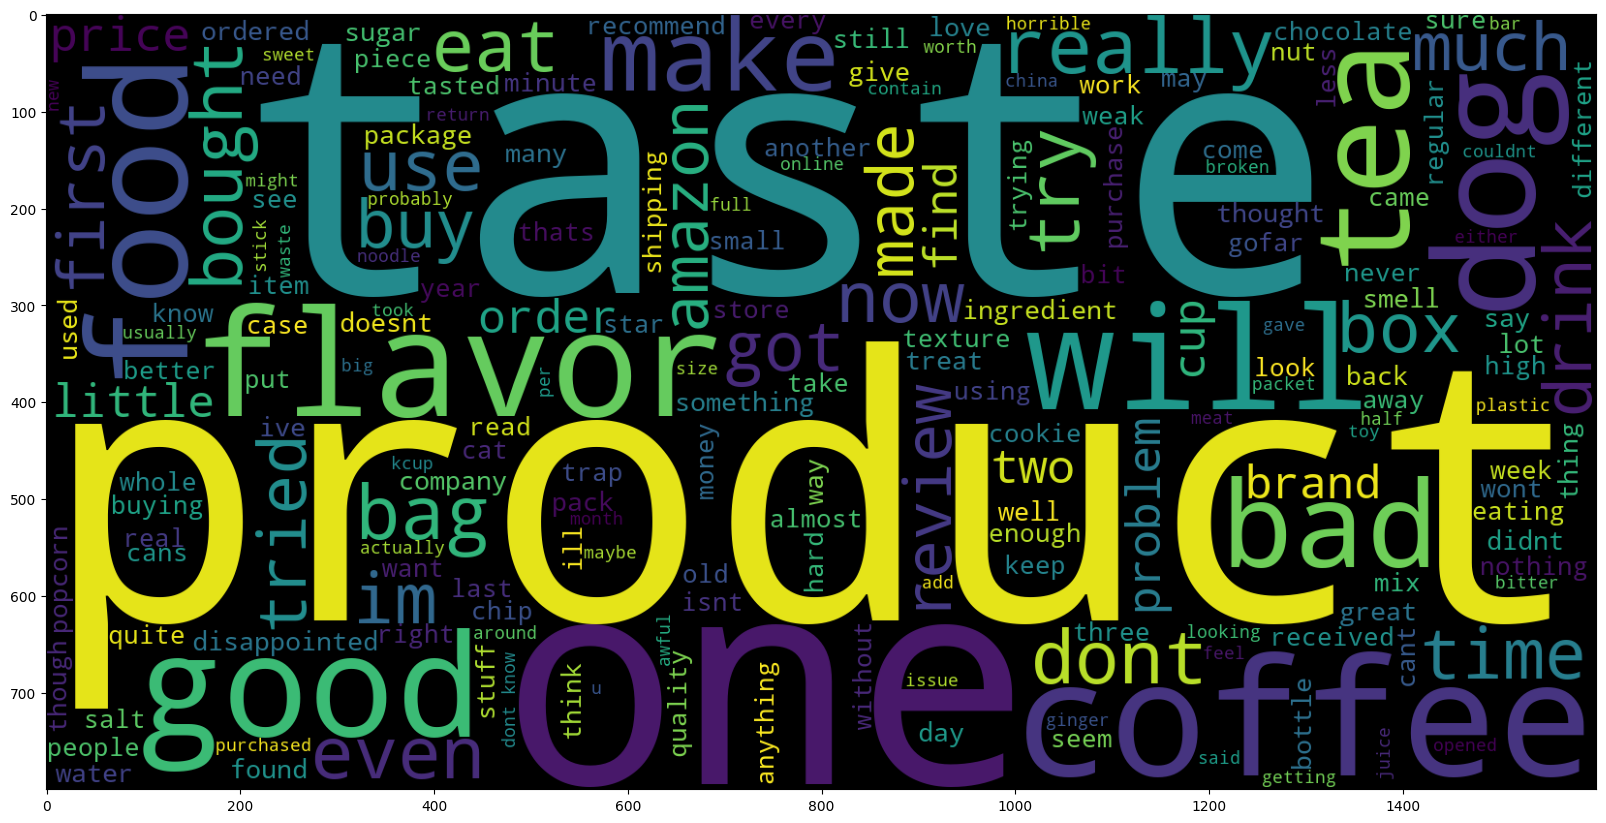

In [115]:
#for negative sentiment
from wordcloud import WordCloud
negative_reviews = df[df["sc"] == 'Negative']['Text'].sample(n=1000, random_state=42).str.cat(sep=' ')

plt.figure(figsize = (20,20))
wc = WordCloud(width=1600, height=800).generate(negative_reviews)
plt.imshow(wc)

In [125]:
df.to_csv('rev_cleaned.csv',index=False)
